In [47]:
# Importando as bibliotecas 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

from tensorflow import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation,Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import layers




In [2]:
#dataset = keras.preprocessing.image_dataset_from_directory(
  #'C:\\Users\\jeffe\\Documents\\Projects\\trafic\\archive\\Train', batch_size=64, image_size=(200, 200))

#carregar pil

In [3]:
#dataset

In [48]:
# Separando os dados em conjunto de treino e validação(teste)


image_size = (64, 64)
batch_size = 64

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\jeffe\\Documents\\Projects\\trafic\\archive\\Train',
    validation_split=0.2,
    subset="training",
    class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42'],
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\jeffe\\Documents\\Projects\\trafic\\archive\\Train',
    validation_split=0.2,
    subset="validation",
    class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42'],
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


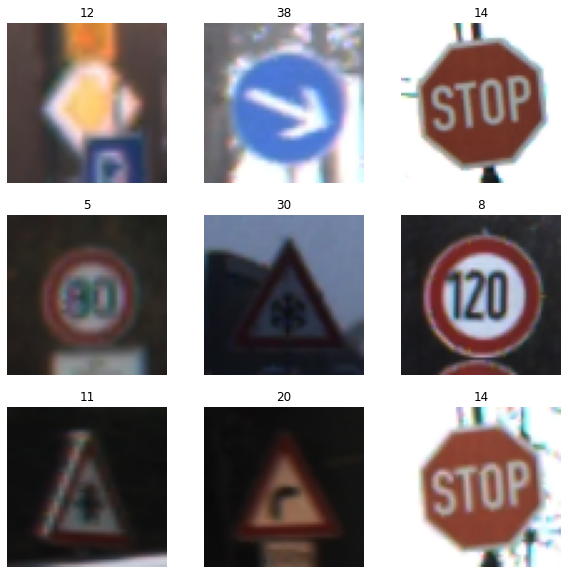

In [53]:
# Plotagem das imagens dos nossos dados 

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(3):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
#train_ds = train_ds.prefetch(buffer_size=32)
#val_ds = val_ds.prefetch(buffer_size=32)

In [50]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape = (64, 64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

In [51]:

opt = keras.optimizers.Adam(learning_rate = 0.001)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(43))
model.add(Activation('Softmax'))

model.compile(
    optimizer=opt,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


In [52]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 activation_40 (Activation)  (None, 62, 62, 16)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 31, 31, 16)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 29, 29, 64)        9280      
                                                                 
 activation_41 (Activation)  (None, 29, 29, 64)        0         
                                                      

In [54]:

epochs = 15

history = model.fit(
    train_ds, epochs=epochs, validation_data=val_ds,batch_size=128
)


Epoch 1/15
491/491 [==============================] - 71s 143ms/step - loss: 3.8955 - accuracy: 0.2630 - val_loss: 1.9497 - val_accuracy: 0.4053
Epoch 2/15
491/491 [==============================] - 68s 137ms/step - loss: 1.7596 - accuracy: 0.4347 - val_loss: 1.0890 - val_accuracy: 0.6679
Epoch 3/15
491/491 [==============================] - 66s 135ms/step - loss: 0.8171 - accuracy: 0.7363 - val_loss: 0.2988 - val_accuracy: 0.9241
Epoch 4/15
491/491 [==============================] - 67s 135ms/step - loss: 0.3908 - accuracy: 0.8730 - val_loss: 0.1616 - val_accuracy: 0.9546
Epoch 5/15
491/491 [==============================] - 66s 135ms/step - loss: 0.2582 - accuracy: 0.9189 - val_loss: 0.1066 - val_accuracy: 0.9700
Epoch 6/15
491/491 [==============================] - 66s 135ms/step - loss: 0.1960 - accuracy: 0.9380 - val_loss: 0.0757 - val_accuracy: 0.9792
Epoch 7/15
491/491 [==============================] - 67s 137ms/step - loss: 0.1578 - accuracy: 0.9517 - val_loss: 0.0601 - val_ac

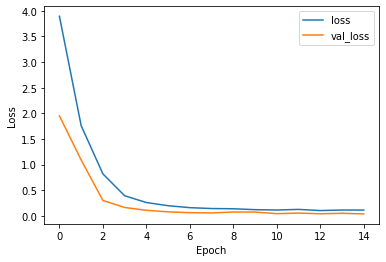

In [55]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')